In [13]:
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [4]:
!uv add install pandas --frozen
import pandas as pd

In [5]:
pd.__version__

'2.3.3'

In [6]:
from pathlib import Path

In [83]:
path_csv = "/home/twb/Work/gics_sector_returns_etf_proxy.csv"
df = pd.read_csv(path_csv)

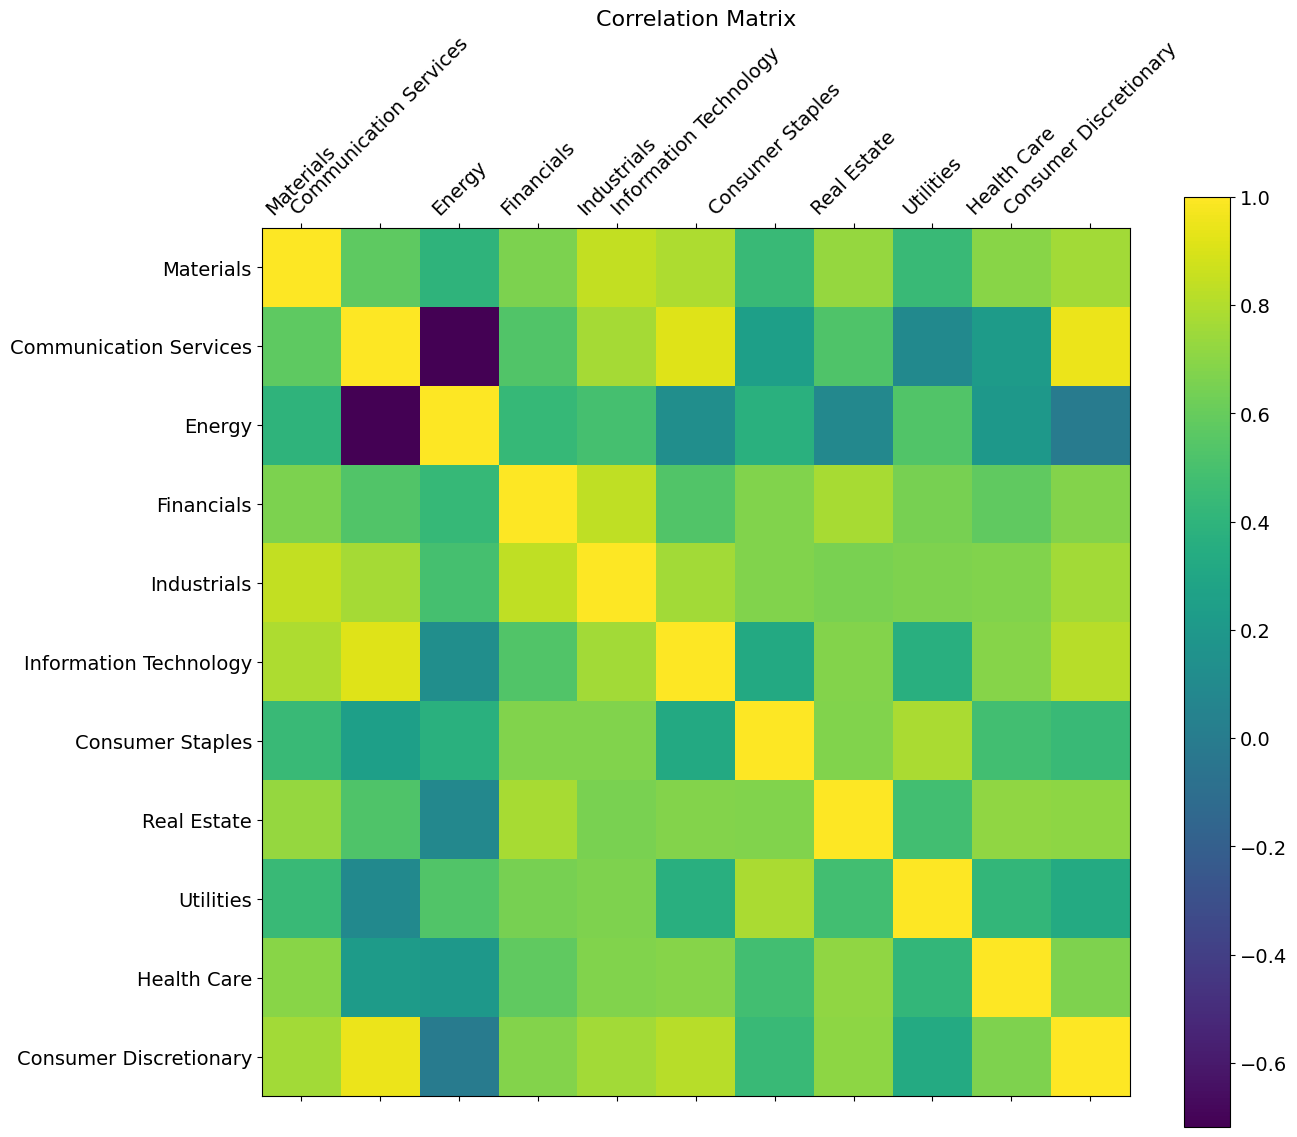

In [84]:
df_cut = df.iloc[:, 2:]
f = plt.figure(figsize=(14, 12))
plt.matshow(df_cut.corr(), fignum=f.number)
plt.xticks(range(df_cut.select_dtypes(['number']).shape[1]), df_cut.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df_cut.select_dtypes(['number']).shape[1]), df_cut.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [113]:
# get comparison with market
for col in df_cut.columns:
    df[f'diff_{col}'] = df[col] - df.iloc[:, 1]

    

In [114]:
def plot_diff(df:pd.DataFrame,mode=None, *args, **kwargs):

    col_diff = list(df.columns)
    n_cols= len(col_diff)
    fig, axes = plt.subplots(ncols=n_cols//2, nrows= n_cols %2 +1, figsize=(20, 12))
    print(axes.shape)
    for col, ax in zip(col_diff, axes.ravel()):
        ax.plot(df[col])
        ax.set_title(f"{col}")
        ax.set_xlabel("Years")
        ax.set_ylabel("Diff")
    plt.tight_layout()


In [127]:

def plot_diff(df: pd.DataFrame, mode: str | None = "diff", ncols: int = 3, save=False, **plot_kw):
    d = df.iloc[:, 1:].copy()                               # exclude first two
    if mode: d = d[[c for c in d.columns if mode in c]]     # filter by mode
    d = d.dropna(axis=1, how="all")                         # drop all-NaN cols
    # d = d.dropna(axis=0, how="any")                         # drop rows with NaNs
    if d.shape[1] == 0: raise ValueError("No columns to plot after filtering/NaN drops.")

    n = d.shape[1]
    ncols = min(ncols, n)
    nrows = math.ceil(n / ncols)
    fig, axes = plt.subplots(nrows, ncols, figsize=(5*ncols, 3.5*nrows), squeeze=False)

    for ax, col in zip(axes.ravel(), d.columns):
        mean = d[col].mean()
        ax.plot(d[col].to_numpy(), **plot_kw)
        ax.axhline(mean, c="red")
        ax.set_title(col)

    for ax in axes.ravel()[n:]:
        ax.set_axis_off()

    fig.tight_layout()
    if save is not None:
        plt.savefig("difference_plot.png", dpi=150)
    plt.show()
    return fig, axes

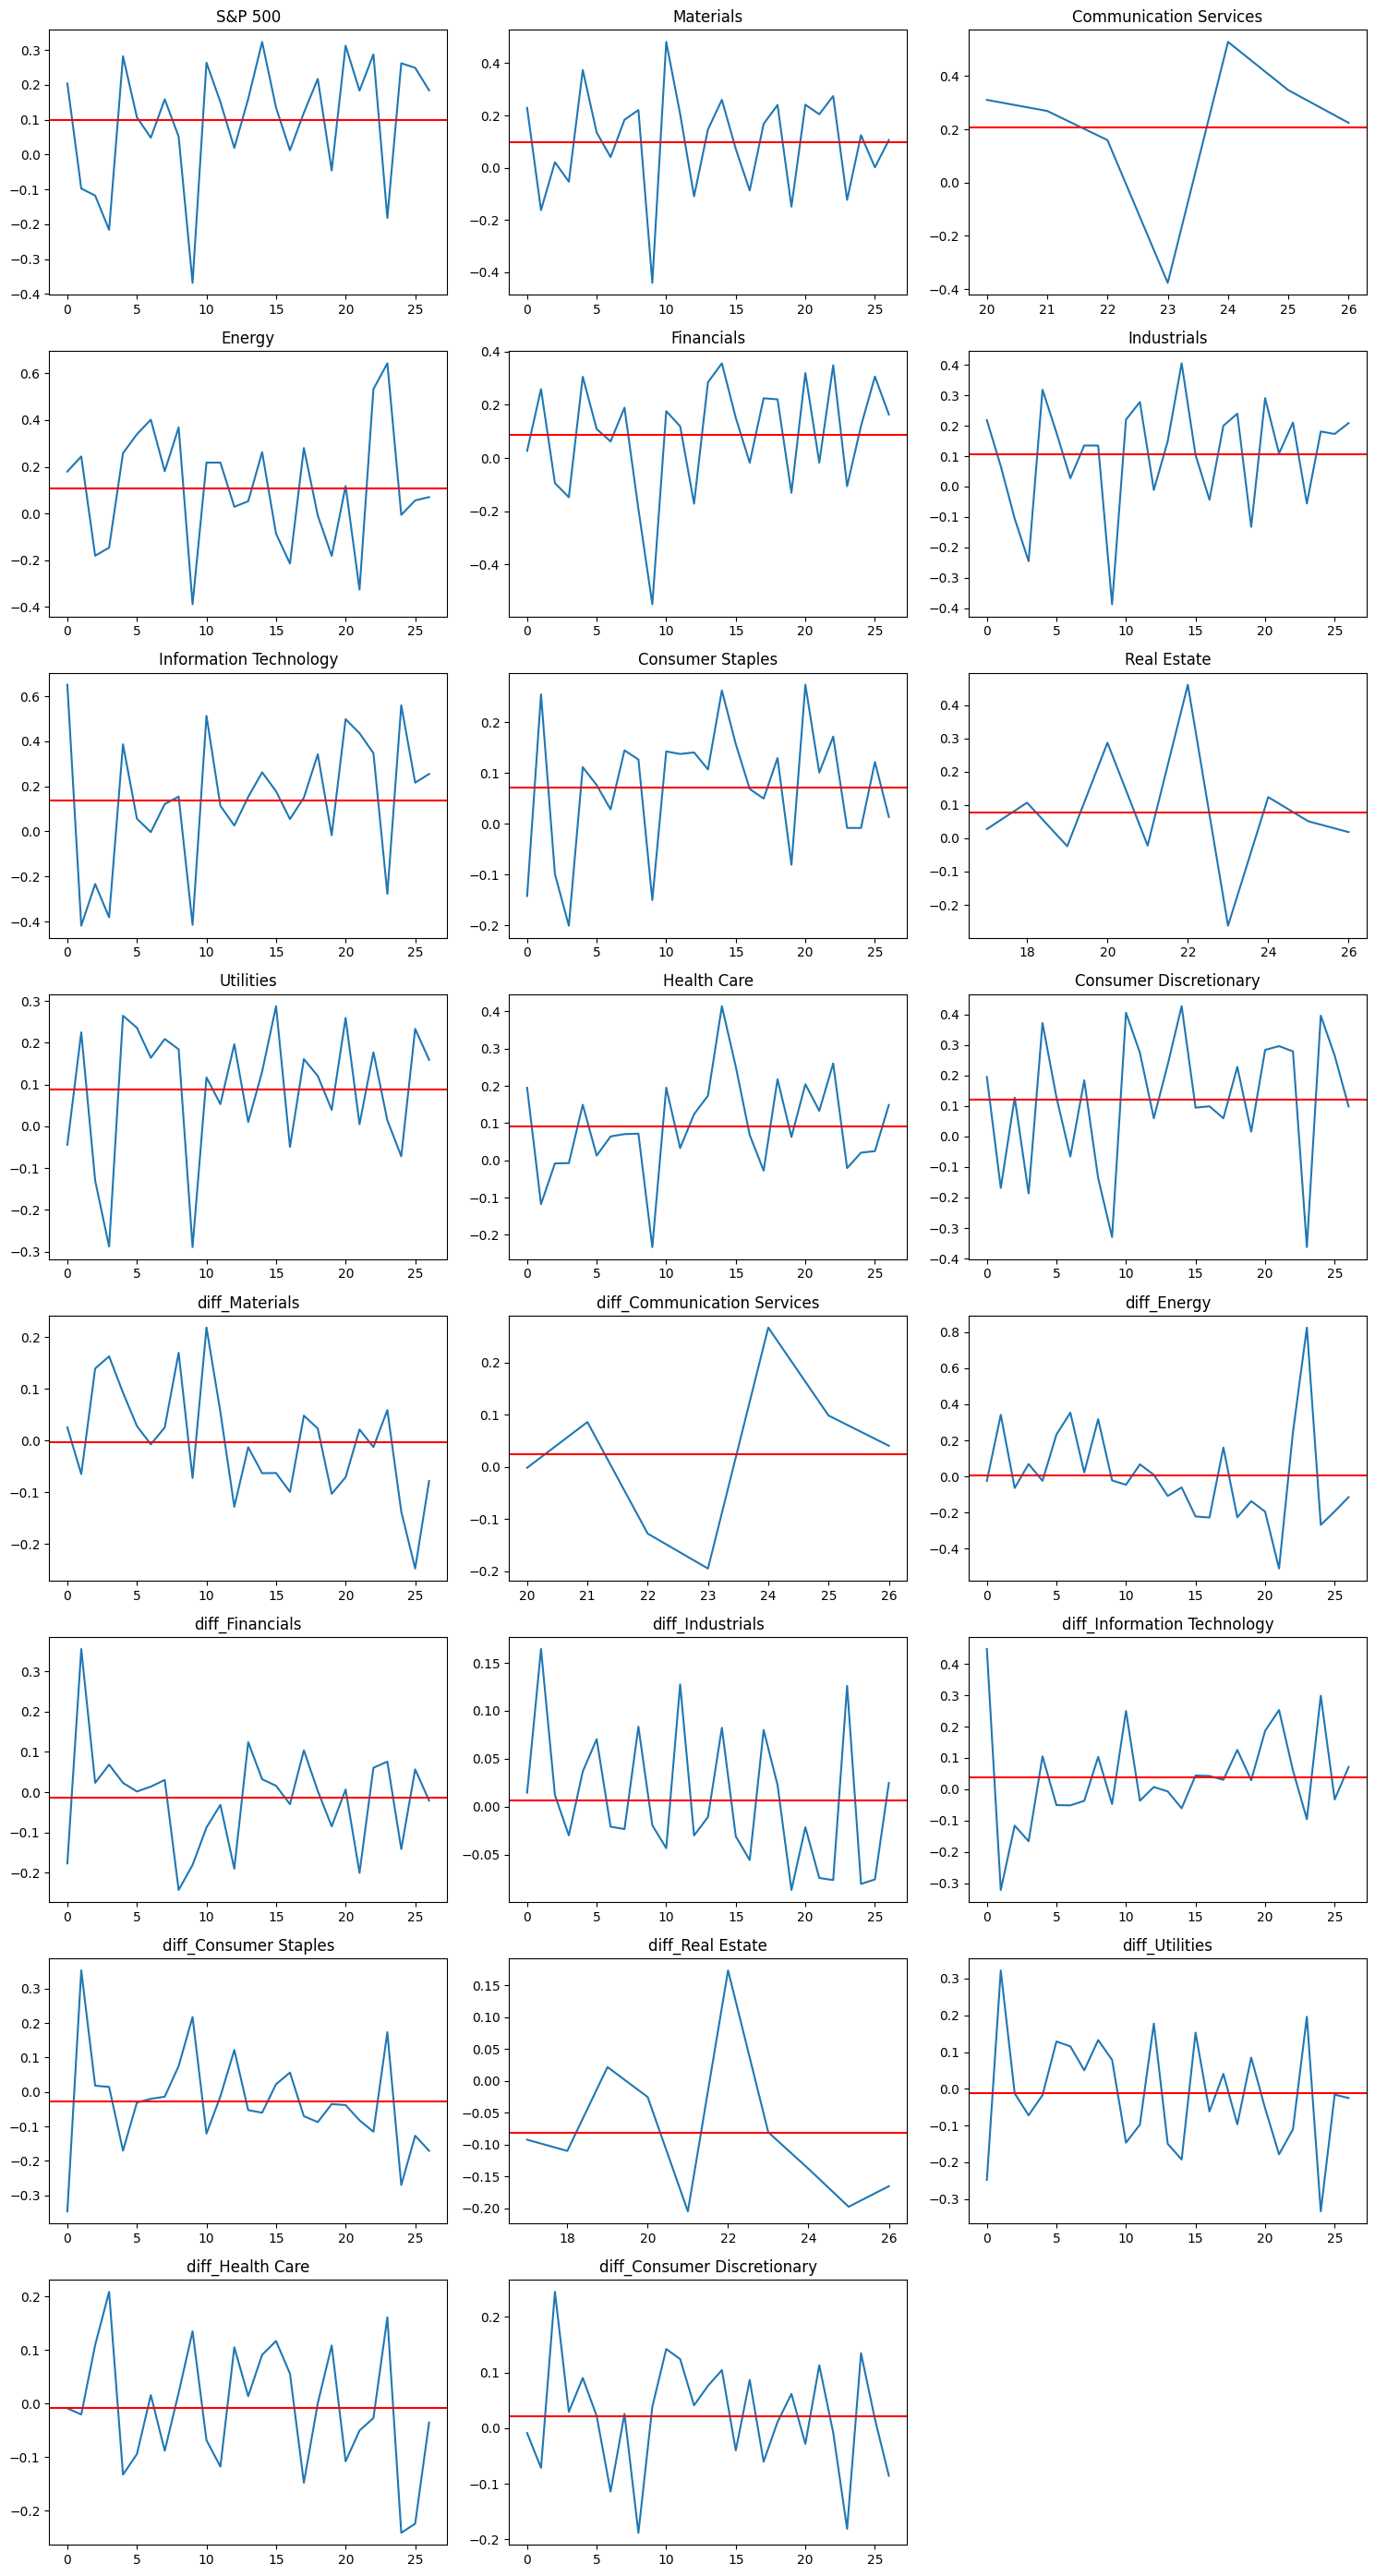

(<Figure size 1500x2800 with 24 Axes>,
 array([[<Axes: title={'center': 'S&P 500'}>,
         <Axes: title={'center': 'Materials'}>,
         <Axes: title={'center': 'Communication Services'}>],
        [<Axes: title={'center': 'Energy'}>,
         <Axes: title={'center': 'Financials'}>,
         <Axes: title={'center': 'Industrials'}>],
        [<Axes: title={'center': 'Information Technology'}>,
         <Axes: title={'center': 'Consumer Staples'}>,
         <Axes: title={'center': 'Real Estate'}>],
        [<Axes: title={'center': 'Utilities'}>,
         <Axes: title={'center': 'Health Care'}>,
         <Axes: title={'center': 'Consumer Discretionary'}>],
        [<Axes: title={'center': 'diff_Materials'}>,
         <Axes: title={'center': 'diff_Communication Services'}>,
         <Axes: title={'center': 'diff_Energy'}>],
        [<Axes: title={'center': 'diff_Financials'}>,
         <Axes: title={'center': 'diff_Industrials'}>,
         <Axes: title={'center': 'diff_Information Tec

In [128]:
plot_diff(df, mode=None, save=True)